In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
from scipy.signal import convolve2d
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:00<00:00, 145.20it/s]


In [ ]:
gt_images.shape #the images are of size (256 * 256) pixels

(4, 256, 256, 3)

In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

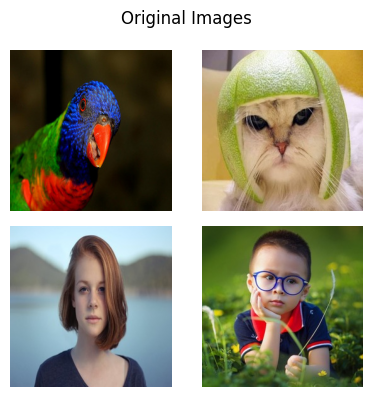

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):

    noisy_image = np.copy(image)

    # Since, the noise has been called just impulse noise, we will add both salt and pepper noise.

    # Salt noise
    salt_mask = np.random.rand(*image.shape) < noise_prob  # '*' passes each dimension as a separate argument to the np.random.rand() function
    noisy_image[salt_mask] = 255       # Setting these pixels to white (adding salt)

    # Pepper noise
    pepper_mask = np.random.rand(*image.shape) < noise_prob
    noisy_image[pepper_mask] = 0       # Setting these pixels to black (adding pepper)

    return noisy_image

def add_gaussian_noise(image, mean, std):
    gaussian_dist = np.random.normal(mean, std, image.shape)

    noisy_image = image + gaussian_dist.astype("uint8")   # "uint8" makes the gaussian_dist entries
                                                   #  of size 8 bit (max value = 255)

    noisy_image = np.clip(noisy_image, 0, 255)  # some entries might have crossed 255 after previous addition

    return noisy_image

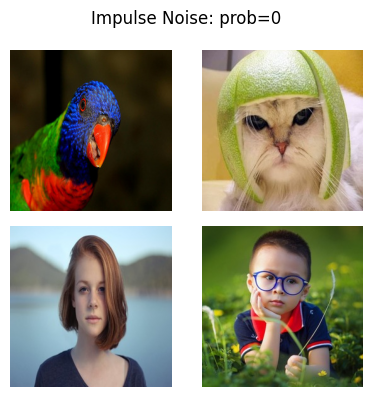

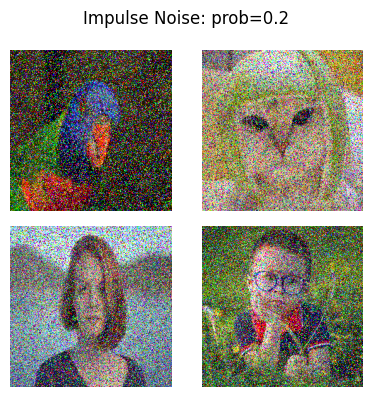

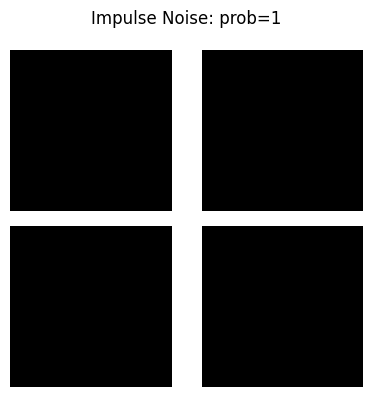

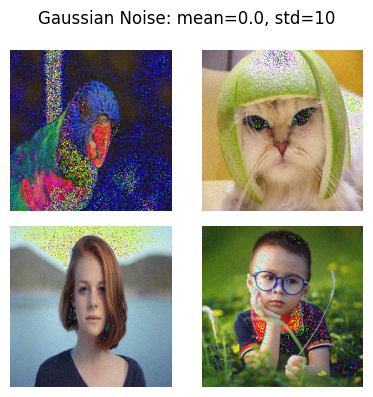

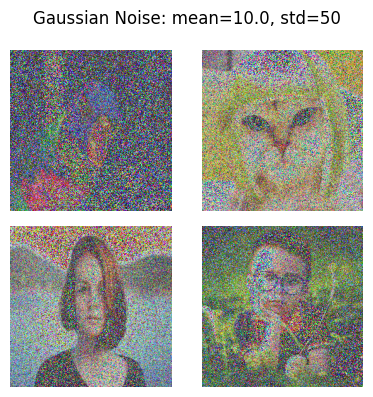

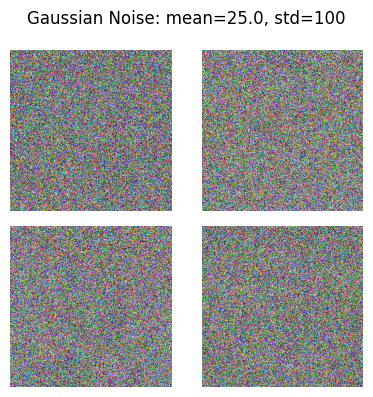

In [ ]:
# Arrays with varying values
noise_prob_array = [0, 0.2, 1]
mean_array = np.array([0., 10., 25.])
std_array = [10, 50, 100]

impulse_noisy_images_list = []
gaussian_noisy_images_list = []

for noise_prob in noise_prob_array:
    impulse_noisy_images = []
    for image in gt_images:
      impulse_noisy_images.append(add_impulse_noise(image, noise_prob=noise_prob))

    impulse_noisy_images = np.array(impulse_noisy_images)
    impulse_noisy_images_list.append(impulse_noisy_images)

    show_image_grid(impulse_noisy_images, M=2, N=2,
                title=f'Impulse Noise: prob={noise_prob}')


for mean, std in zip(mean_array, std_array):
    gaussian_noisy_images = []

    for image in gt_images:
        gaussian_noisy_images.append(add_gaussian_noise(image, mean=mean, std=std))

    gaussian_noisy_images = np.array(gaussian_noisy_images)

    gaussian_noisy_images_list.append(gaussian_noisy_images)

    show_image_grid(gaussian_noisy_images, M=2, N=2,
                    title=f'Gaussian Noise: mean={mean}, std={std}')


In [ ]:
np.array(impulse_noisy_images_list).shape # 3 sets of 4 images

(3, 4, 256, 256, 3)

Insight: Pixel = Picture Element

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

$$
\text{If image size is (n × n), filter size is (f × f) and a padding of p pixels is applied, size of resulting convolved image = (n+2p-f+1) × (n+2p-f+1)}
$$


$$
\text{If size of resulting image has to be equal to size of original image:}\
(n+2p-f+1) = n \\
\implies p = \frac{f-1}{2}
$$


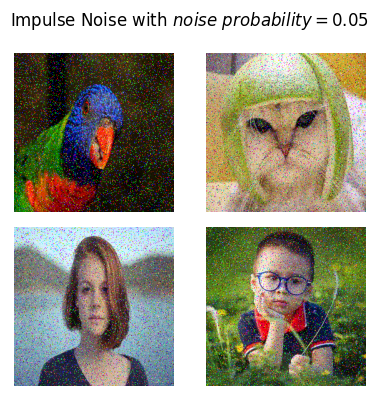

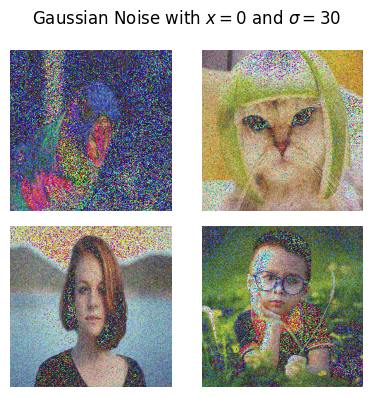

In [ ]:
# Generating images with required noise levels

impulse_noisy_images  = []
gaussian_noisy_images = []

for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
    gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise with $noise \ probability = 0.05$')
show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise with $x=0$ and $\sigma = 30$')

In [ ]:
def convolve_2d(image, kernel):
  """
  works only for 2 or 3 channel images as of now
  """

  if len(image.shape) == 2:
    return convolve2d(image, kernel, mode="same", boundary="fill", fillvalue=0)

  elif len(image.shape) == 3:
    output = np.zeros_like(image)
    for c in range(image.shape[2]):
      output[:, :, c] = convolve2d(image[:, :, c], kernel, mode = "same", boundary="fill", fillvalue=0)

    return output

$$
\text{A 2D Gaussian is given by:} \\
G(x,y) = \frac{1}{2 \pi \sigma^2} \exp\left(-\frac{x^2 + y^2}{2 \sigma^2}\right)
$$


In [ ]:
def apply_box_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    blurred_image = convolve_2d(image, kernel)
    return blurred_image

def apply_gaussian_filter(image, kernel_size, sigma):

    if kernel_size % 2 == 0:
      raise ValueError("Kernel size must be odd.")

    ax = np.linspace(-((kernel_size)//2), kernel_size//2, kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)

    blurred_image = convolve_2d(image, kernel)

    return blurred_image

def apply_median_filter(image, kernel_size):
    rows, cols, num_channels = image.shape

    pad_size = kernel_size // 2

    filtered_image = np.zeros_like(image)

    for channel in range(num_channels):

      padded_image = np.pad(image[:,:,channel], pad_size, mode = "constant", constant_values=0)

      #Iterate over every pixel in the image (excluding the padding)
      for i in range(rows):
        for j in range(cols):

          #Extracting the k*k neighbourhood around the pixel
          neighbourhood = padded_image[i:i+kernel_size, j:j+kernel_size]

          flattened_neighbourhood = neighbourhood.flatten()

          median_value = np.median(flattened_neighbourhood)

          filtered_image[i, j, channel] = median_value

    return filtered_image

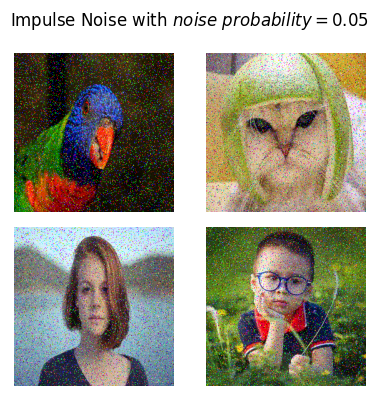

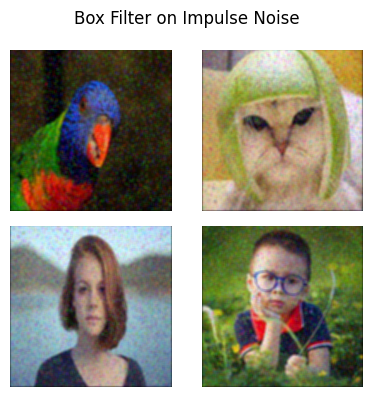

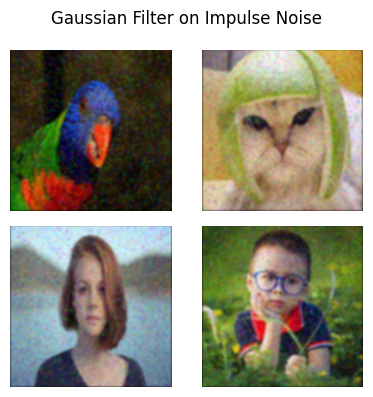

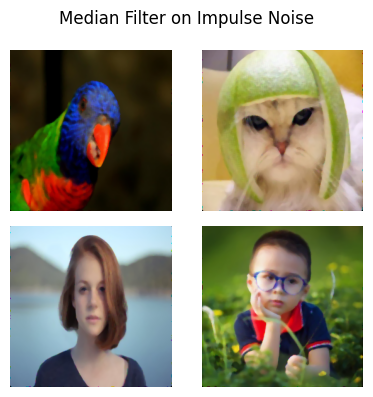

In [ ]:
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise with $noise \ probability = 0.05$')

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

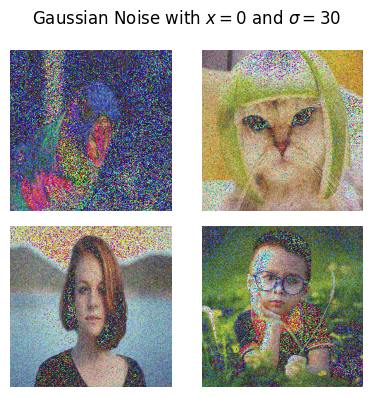

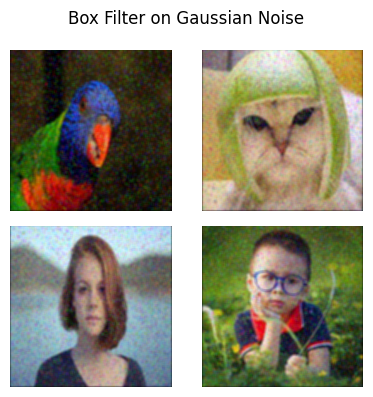

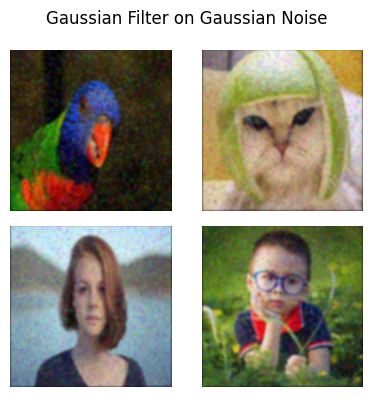

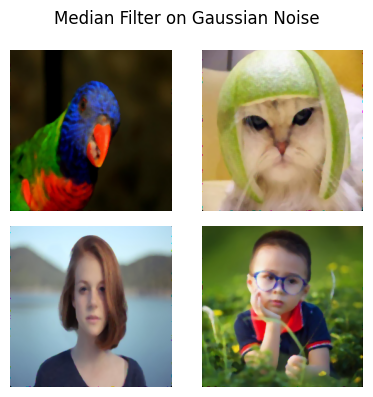

In [ ]:
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_impulse)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_impulse)
median_filter_images_gaussian = np.array(median_filter_images_impulse)

show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise with $x=0$ and $\sigma = 30$')

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Gaussian Noise')

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

The magnitude and the slope of the gradient:
$$
|G| = \sqrt{I_x^2 + I_y^2} \\
\theta(x,y) = arctan(\frac{I_y}{I_x})
$$



In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges


In [ ]:
def apply_canny_edge_detector_self(image, threshold1, threshold2):

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rows, cols = gray_image.shape

  ### -------------------------Image smoothening --------------------------
  smoothed_image = apply_gaussian_filter(gray_image, kernel_size=5, sigma=2.0)

  ### -------------------------Gradient calculation --------------------------
  Kx = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

  Ky = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

  Ix = convolve_2d(gray_image, Kx)
  Iy = convolve_2d(gray_image, Ky)

  G = np.hypot(Ix, Iy)
  G = ((G - G.mean())/ (G.max() - G.min())) * 255

  theta = np.arctan2(Iy, Ix)

### ------------------------- Non-maximal supression --------------------------
  rows, cols = G.shape
  Z = np.zeros((rows, cols))
  angle = (theta * 180.)/np.pi   #converting angles to degrees
  angle[angle < 0] += 180

  for i in range(1, rows-1):
    for j in range(1, cols-1):
        q = 255
        r = 255

        #angle 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
          q = G[i, j+1]
          r = G[i, j-1]

        #angle 45
        elif (22.5 <= angle[i,j] < 67.5):
          q = G[i+1, j-1]
          r = G[i-1, j+1]

        #angle 90
        elif (67.5 <= angle[i,j] < 112.5):
          q = G[i+1, j]
          r = G[i-1, j]

        #angle 135
        elif (112.5 <= angle[i,j] < 157.5):
          q = G[i-1,  j-1]
          r = G[i+1, j+1]


        if ((G[i,j]) >= q) and (G[i, j] >= r):
          Z[i,j]  = G[i,j]                        # if the pixel being operated on
                                                      # is brightest, keep it
        else:
          Z[i,j] = 0

  h = threshold1
  l = threshold2

### ---------------- Thresholding ------------------------------
  resultant = np.zeros_like(Z)
  strong_edges = (Z >= h)
  weak_edges = ((Z >= l) & (Z < h))

  resultant[strong_edges] = 255

### ------------------ Hysteresis ----------------------------------
  for r in range(1, rows-1):
    for c in range(1, cols-1):
      if weak_edges[r, c]:
        if (strong_edges[r - 1:r+2, c-1:c+1].any()):
          resultant[r,c] = 255

  edges = cv2.cvtColor(resultant.astype(np.uint8), cv2.COLOR_GRAY2BGR)

  return edges


In [ ]:
threshold1 = 80
threshold2 = 180

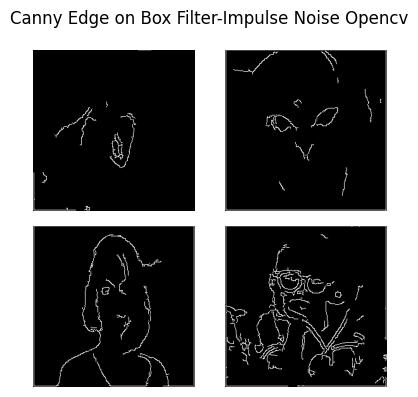

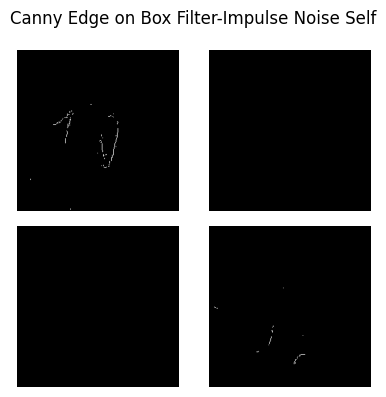

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

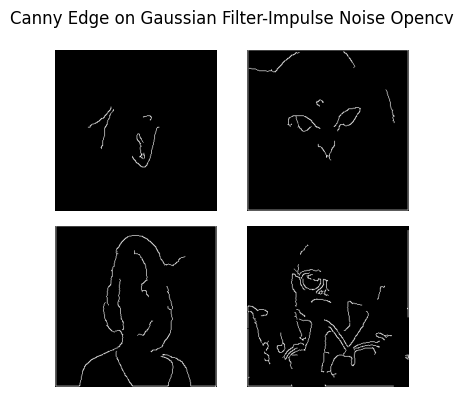

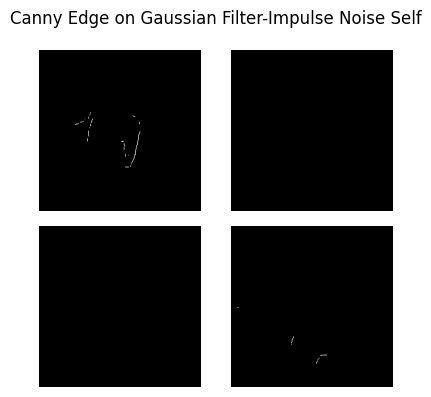

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_opencv_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

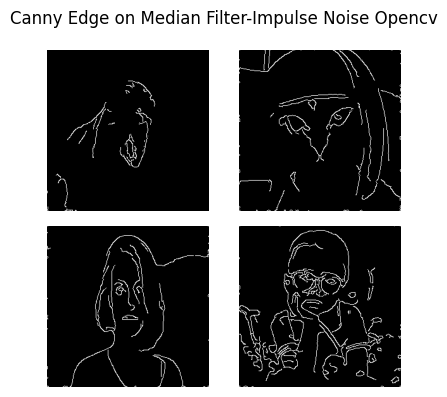

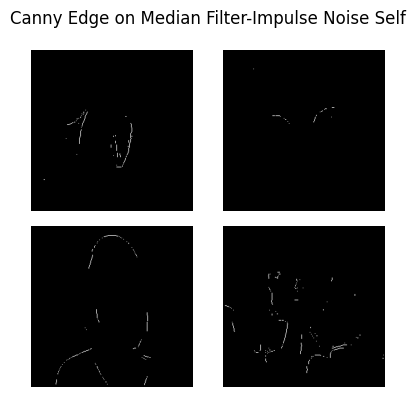

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_opencv_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

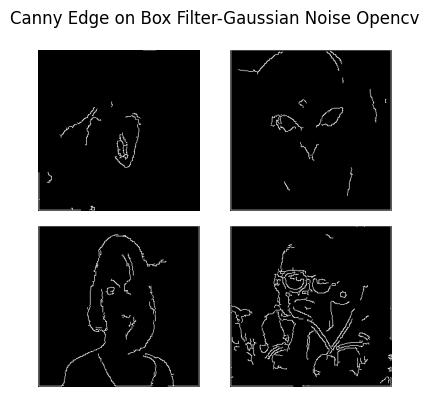

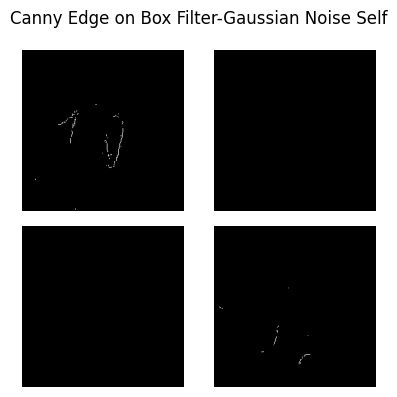

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_opencv_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

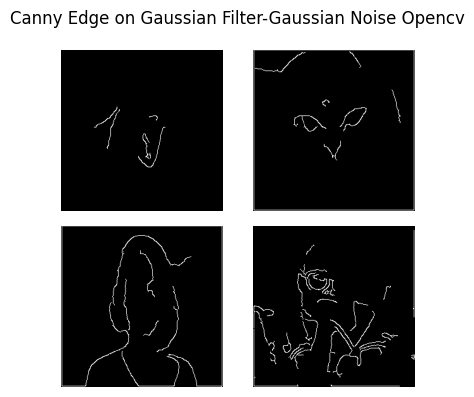

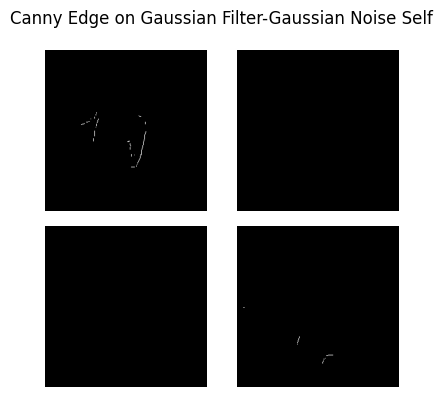

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_opencv_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

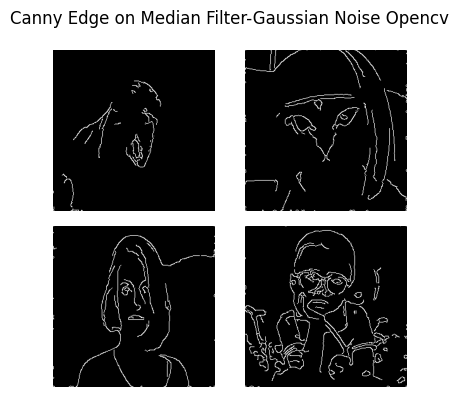

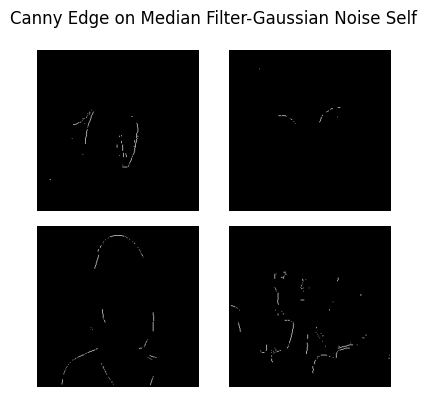

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_opencv_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

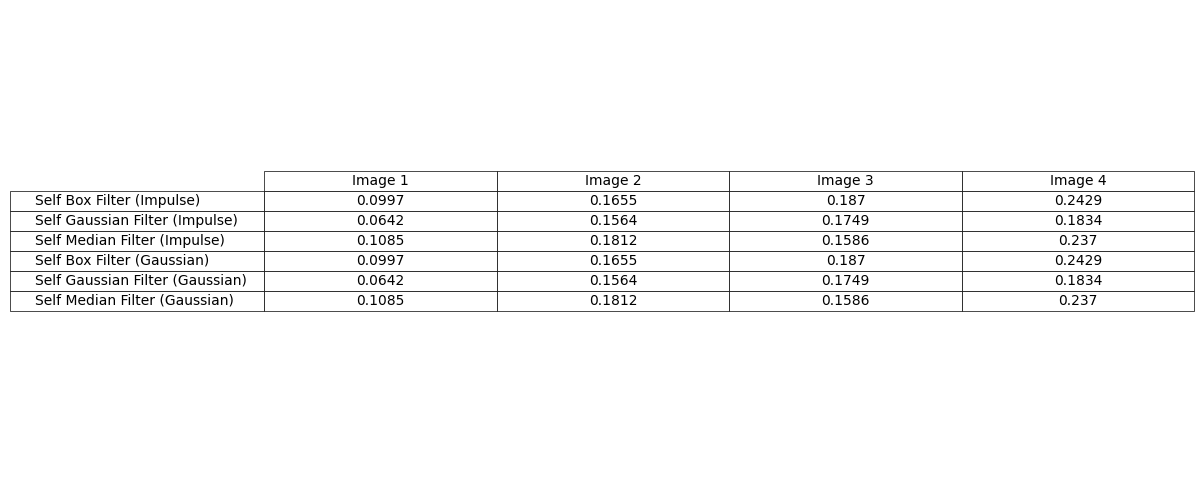

In [ ]:
# List of image sets for self and OpenCV implementations
self_implementation_images = [
    canny_edge_self_box_filter_images_impulse,
    canny_edge_self_gaussian_filter_images_impulse,
    canny_edge_self_median_filter_images_impulse,
    canny_edge_self_box_filter_images_gaussian,
    canny_edge_self_gaussian_filter_images_gaussian,
    canny_edge_self_median_filter_images_gaussian
]

opencv_implementation_images = [
    canny_edge_opencv_box_filter_images_impulse,
    canny_edge_opencv_gaussian_filter_images_impulse,
    canny_edge_opencv_median_filter_images_impulse,
    canny_edge_opencv_box_filter_images_gaussian,
    canny_edge_opencv_gaussian_filter_images_gaussian,
    canny_edge_opencv_median_filter_images_gaussian
]

# Function to calculate RMS error
def calculate_rms_error(img1, img2):
    return np.sqrt(np.mean((img1 - img2) ** 2))

# Initialize the 6x4 table to store RMS errors
rms_error_table = np.zeros((6, 4))

# Calculate RMS errors
for i in range(6):  # For each type of image processing
    for j in range(4):  # For each image in the set
        rms_error_table[i, j] = calculate_rms_error(self_implementation_images[i][j], opencv_implementation_images[i][j])

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Table data and headers
table_data = rms_error_table
column_labels = ["Image 1", "Image 2", "Image 3", "Image 4"]
row_labels = [
    "Self Box Filter (Impulse)",
    "Self Gaussian Filter (Impulse)",
    "Self Median Filter (Impulse)",
    "Self Box Filter (Gaussian)",
    "Self Gaussian Filter (Gaussian)",
    "Self Median Filter (Gaussian)"
]

# Create the table
table = ax.table(cellText=np.round(table_data, 4), rowLabels=row_labels, colLabels=column_labels, cellLoc='center', loc='center')

# Enhance table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Display the plot
plt.show()